# 1. Dimensionality Reduction

### 1. Principal Component Analysis (PCA)

Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display_html 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure visual display properties
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})

Load data

In [3]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Standarddize data first<br />
PCA requires us to standardize the data first to a unit scale with mean 0 and variance 1

In [4]:
features=iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # features
y=iris_df['class'] #target

X=StandardScaler().fit_transform(features) # scale the data
X_scaled=pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) # create dataframe of scaled data
scaled_df=pd.concat([X_scaled,y],axis=1) # join scaled dataframe with target variable

# Display the two dataframes side by side
iris_df = iris_df.head().style.set_table_attributes("style='display:inline'").set_caption('Original DataFrame')
scaled_df = scaled_df.head().style.set_table_attributes("style='display:inline'").set_caption('Scaled DtaFrame')

display_html(iris_df._repr_html_()+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+scaled_df._repr_html_(), raw=True)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa
,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa


Perform PCA with 2 components

In [5]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(X_scaled) # fit and transform data with 2 Components
pca_df=pd.DataFrame(pca_fit,columns=['PC1','PC2']) # Create PCA dataframe
pca_df=pd.concat([pca_df,y],axis=1) # join pca dataframe with target variable
pca_df.head()

,PC1,PC2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Visualize PCA

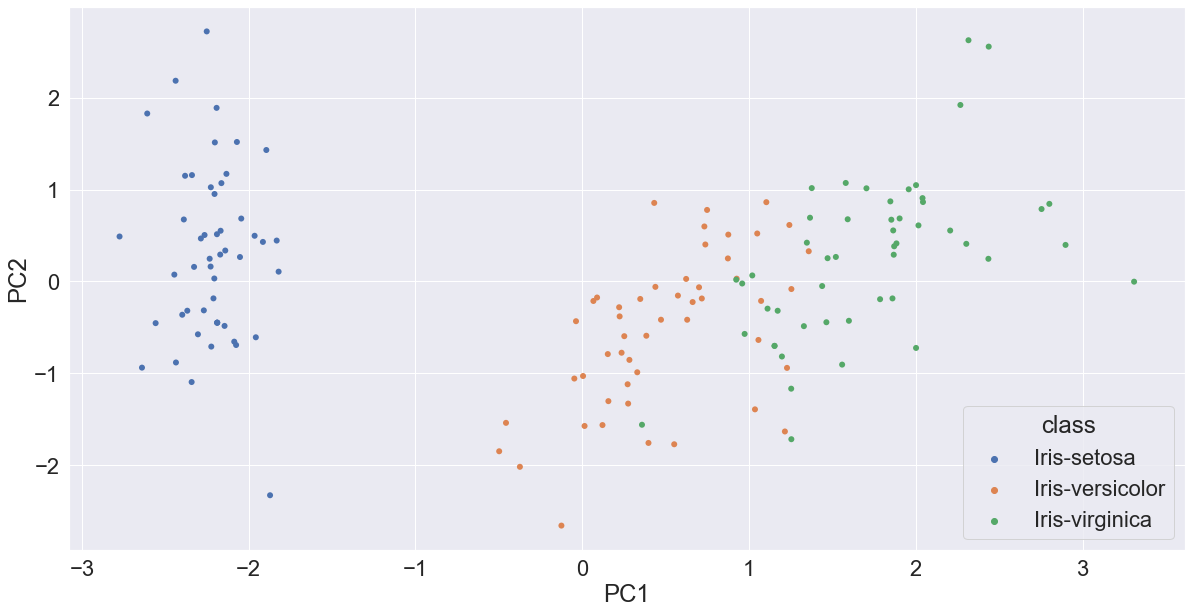

In [6]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="PC1", y="PC2", sizes=(1, 8), linewidth=0,data=pca_df,hue='class')
plt.show()

Explained Variance<br />
Explained Variance tells us the variation in each principal component and how much information we have lost when reducing the dimensionality of the data from high-space (4 features) to low-space (2 features). Variance for teh first and second principal components

In [7]:
(pca.explained_variance_ratio_)*100

array([72.77045209, 23.03052327])

Total variance after dimensionality reduction

In [8]:
sum(pca.explained_variance_ratio_)*100

95.80097536148199

### 2. Independent Component Analysis

In [9]:
from sklearn.decomposition import FastICA

In [10]:
ica=FastICA(n_components=2,random_state=0)
ica_fit=ica.fit_transform(X_scaled)
ica_df=pd.DataFrame(ica_fit,columns=['IC1','IC2'])
ica_df=pd.concat([ica_df,y],axis=1)
ica_df.head()

,IC1,IC2,class
0,0.106742,-0.046924,Iris-setosa
1,0.101808,0.052094,Iris-setosa
2,0.114232,0.022962,Iris-setosa
3,0.111976,0.044912,Iris-setosa
4,0.112162,-0.061513,Iris-setosa


Visualize Independet Component Analysis

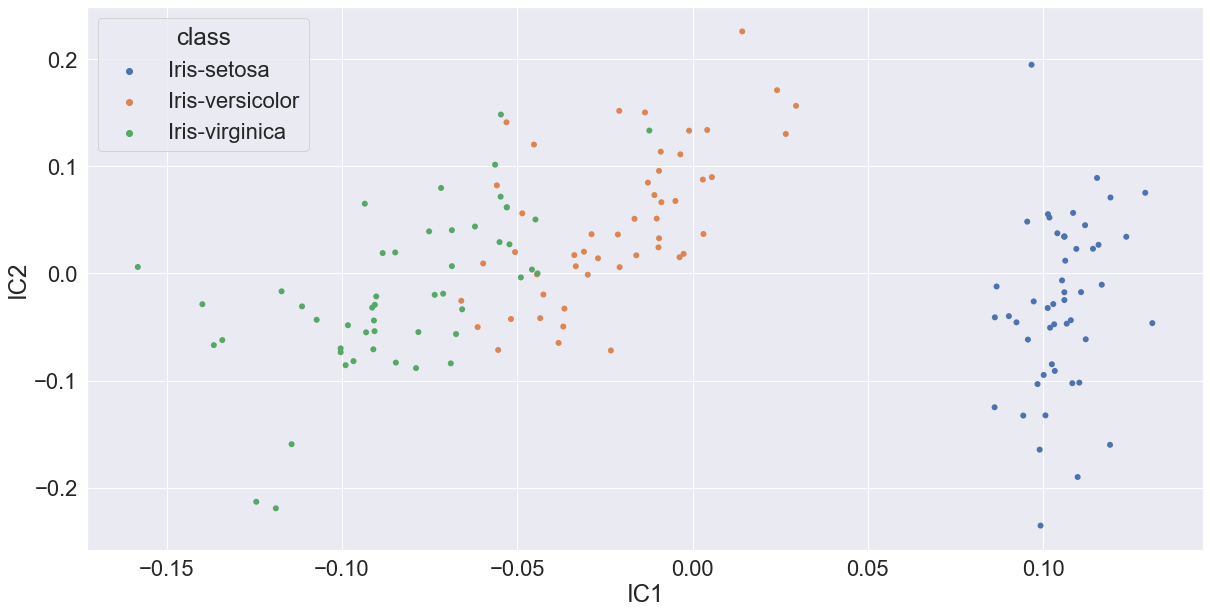

In [11]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="IC1", y="IC2", sizes=(1, 8), linewidth=0,data=ica_df,hue='class')
plt.show()

### 3. Random Forest
Get feature importance with RandomForest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_scaled,y) # train the model

feature_imp = pd.Series(rf_clf.feature_importances_,index=X_scaled.columns).sort_values(ascending=False)
feature_imp

petal_width     0.502619
petal_length    0.383139
sepal_length    0.091559
sepal_width     0.022683
dtype: float64

Visualize Feature Importance

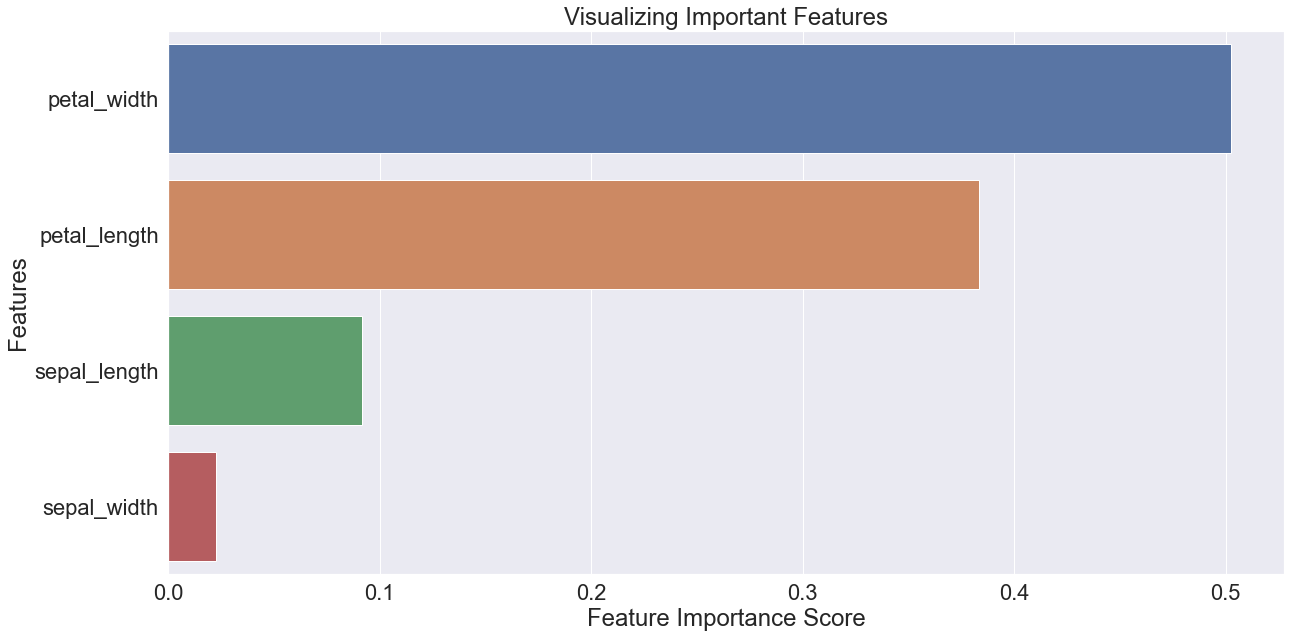

In [14]:
sns.barplot(y=feature_imp.index, x=feature_imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 4. Factor Analysis

In [15]:
from sklearn.decomposition import FactorAnalysis

In [16]:
fa=FactorAnalysis(n_components=2,random_state=0)
fa_transform=fa.fit_transform(X_scaled)
fa_df=pd.DataFrame(fa_transform,columns=['FA1','FA2'])
fa_df=pd.concat([fa_df,y],axis=1)
fa_df.head()

,FA1,FA2,class
0,-1.342095,0.505984,Iris-setosa
1,-1.336775,-0.689392,Iris-setosa
2,-1.396478,-0.278447,Iris-setosa
3,-1.284444,-0.503736,Iris-setosa
4,-1.344103,0.717821,Iris-setosa


Visualize Factor Analysis output

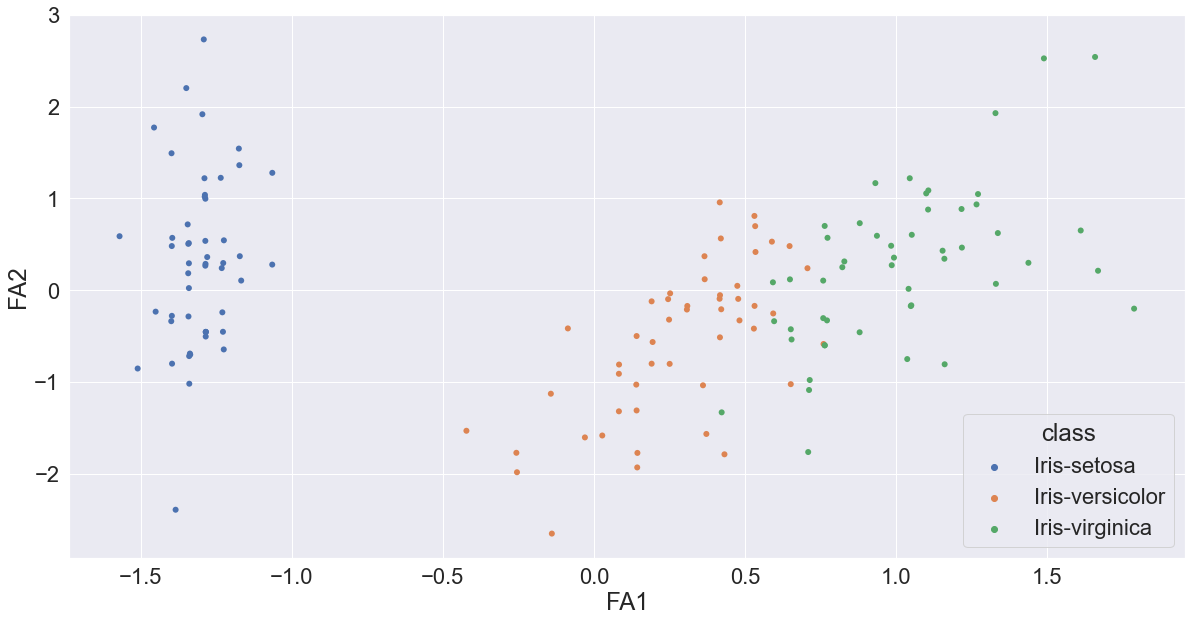

In [17]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="FA1", y="FA2", sizes=(1, 8), linewidth=0,data=fa_df,hue='class')
plt.show()

Compute Features Covariance

In [18]:
fa_cov=pd.DataFrame(fa.get_covariance(),columns=X_scaled.columns,index=X_scaled.columns)
fa_cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.999936,-0.111460,0.871248,0.853953
sepal_width,-0.111460,1.000667,-0.420422,-0.362274
petal_length,0.871248,-0.420422,1.000007,0.962519
petal_width,0.853953,-0.362274,0.962519,1.000002


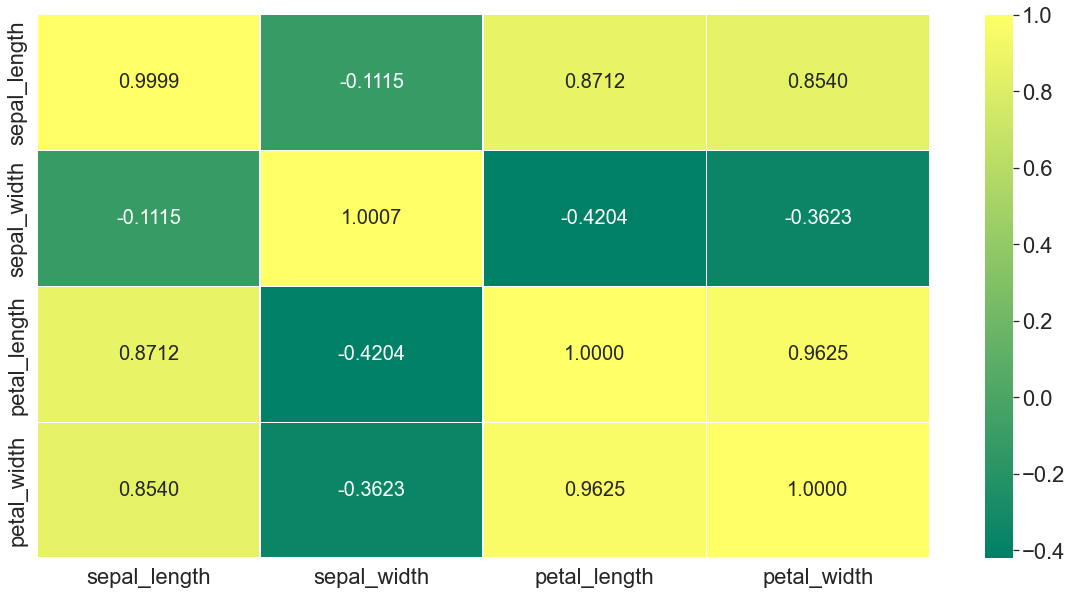

In [19]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20
sns.heatmap(fa_cov, annot=True, fmt=".4f", linewidths=.5,cmap='summer')
plt.show()

### 5. Low Variance filter

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
threshold_value=0.5
vt=VarianceThreshold(threshold=threshold_value)   
vt_fit=vt.fit_transform(features)

Get variances for each feature

In [22]:
print(vt.variances_) # actual variance values
print(vt.get_support()) # True has high variance False has low variance than the threshold

[0.68112222 0.18675067 3.09242489 0.57853156]
[ True False  True  True]


Get columns with low variance based on 0.05 threshold i.e value with similarity of 50%

In [23]:
low_var_=[column for column in features.columns if column not in features.columns[vt.get_support()]]
low_var_

['sepal_width']

In [24]:
remove_low_vars_=features.drop(low_var_,axis=1)

# Drop features with variance less than 50%
iris_df = features.head().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
low_vars_df_ = remove_low_vars_.head().style.set_table_attributes("style='display:inline'").set_caption('After Removing Low Variance Features')

display_html(iris_df._repr_html_()+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+low_vars_df_._repr_html_(), raw=True)

Original Data sepal_length sepal_width petal_length petal_width 
 
 0 
 5.100000 
 3.500000 
 1.400000 
 0.200000 
 
 
 1 
 4.900000 
 3.000000 
 1.400000 
 0.200000 
 
 
 2 
 4.700000 
 3.200000 
 1.300000 
 0.200000 
 
 
 3 
 4.600000 
 3.100000 
 1.500000 
 0.200000 
 
 
 4 
 5.000000 
 3.600000 
 1.400000 
 0.200000 
 
       After Removing Low Variance Features sepal_length petal_length petal_width 
 
 0 
 5.100000 
 1.400000 
 0.200000 
 
 
 1 
 4.900000 
 1.400000 
 0.200000 
 
 
 2 
 4.700000 
 1.300000 
 0.200000 
 
 
 3 
 4.600000 
 1.500000 
 0.200000 
 
 
 4 
 5.000000 
 1.400000 
 0.200000

Option 2 Get features with variance < 50%

In [25]:
variance=features.var()
variance

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [26]:
low_var_features = [ ]

for i in range(0,len(variance)):
    if variance[i]<=0.50: 
        low_var_features.append(features.columns[i])
        
low_var_features

['sepal_width']

In [27]:
remove_low_var_features=features.drop(low_var_features,axis=1)
remove_low_var_features.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [28]:
# Drop features with variance less than 50%
iris_df = features.head().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
low_var_features_df = remove_low_var_features.head().style.set_table_attributes("style='display:inline'").set_caption('After Removing Low Variance Features')

display_html(iris_df._repr_html_()+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+low_var_features_df._repr_html_(), raw=True)

Original Data sepal_length sepal_width petal_length petal_width 
 
 0 
 5.100000 
 3.500000 
 1.400000 
 0.200000 
 
 
 1 
 4.900000 
 3.000000 
 1.400000 
 0.200000 
 
 
 2 
 4.700000 
 3.200000 
 1.300000 
 0.200000 
 
 
 3 
 4.600000 
 3.100000 
 1.500000 
 0.200000 
 
 
 4 
 5.000000 
 3.600000 
 1.400000 
 0.200000 
 
       After Removing Low Variance Features sepal_length petal_length petal_width 
 
 0 
 5.100000 
 1.400000 
 0.200000 
 
 
 1 
 4.900000 
 1.400000 
 0.200000 
 
 
 2 
 4.700000 
 1.300000 
 0.200000 
 
 
 3 
 4.600000 
 1.500000 
 0.200000 
 
 
 4 
 5.000000 
 1.400000 
 0.200000

### 6. High Correlation Filter

Get the correlation matrix first

In [29]:
cor_matrix=features.corr()
cor_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


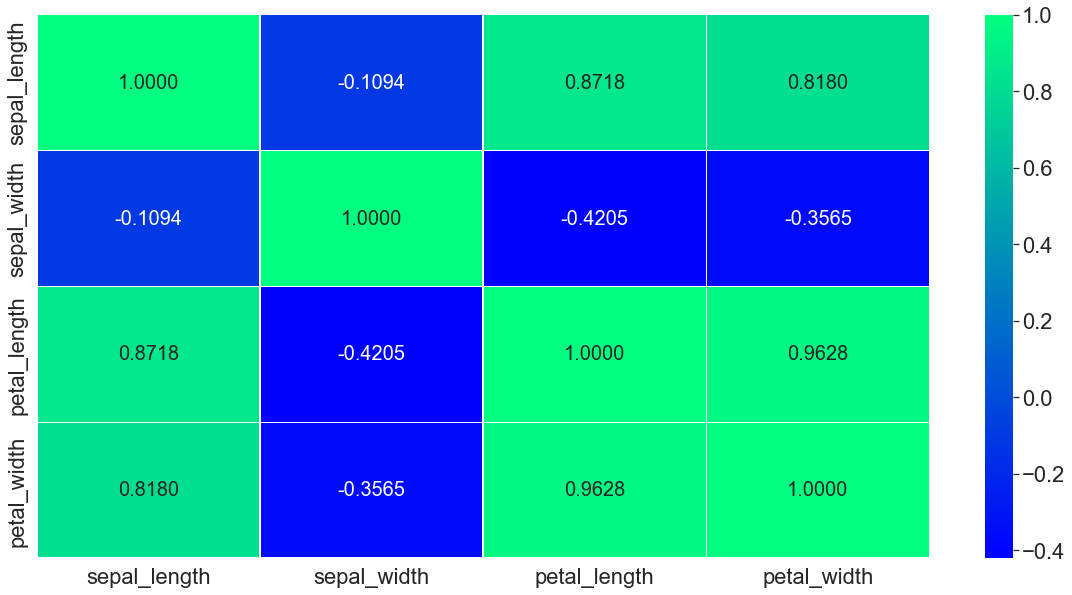

In [30]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'blue'
plt.rcParams['font.size'] = 20
sns.heatmap(cor_matrix, annot=True, fmt=".4f", linewidths=.5,cmap='winter')
plt.show()

Remove correlated features that are duplicates

In [31]:
cor_matrix.unstack().sort_values()

sepal_width   petal_length   -0.420516
petal_length  sepal_width    -0.420516
sepal_width   petal_width    -0.356544
petal_width   sepal_width    -0.356544
sepal_length  sepal_width    -0.109369
sepal_width   sepal_length   -0.109369
sepal_length  petal_width     0.817954
petal_width   sepal_length    0.817954
sepal_length  petal_length    0.871754
petal_length  sepal_length    0.871754
              petal_width     0.962757
petal_width   petal_length    0.962757
sepal_length  sepal_length    1.000000
sepal_width   sepal_width     1.000000
petal_length  petal_length    1.000000
petal_width   petal_width     1.000000
dtype: float64

In [32]:
cor_matrix.unstack().sort_values().drop_duplicates() # drop duplicates features

sepal_width   petal_length   -0.420516
              petal_width    -0.356544
sepal_length  sepal_width    -0.109369
              petal_width     0.817954
              petal_length    0.871754
petal_length  petal_width     0.962757
sepal_length  sepal_length    1.000000
dtype: float64

Remove correlated features based on defined correlation thrshold

In [33]:
# Create an upper triangle matrix with np.triu
upper_triangle_martix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_triangle_martix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,NaN,-0.109369,0.871754,0.817954
sepal_width,NaN,NaN,-0.420516,-0.356544
petal_length,NaN,NaN,NaN,0.962757
petal_width,NaN,NaN,NaN,NaN


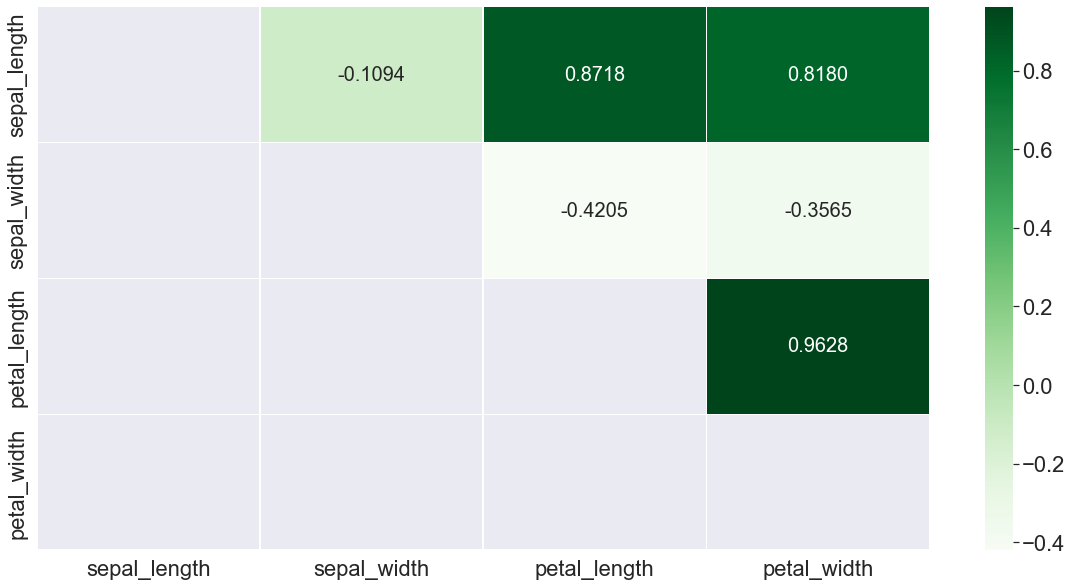

In [34]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
plt.rcParams['font.size'] = 20
sns.heatmap(upper_triangle_martix, annot=True, fmt=".4f", linewidths=.5,cmap='Greens')
plt.show()

In [35]:
correlated_features=[column for column in upper_triangle_martix.columns if any(upper_triangle_martix[column] > 0.90)]
correlated_features

['petal_width']

In [36]:
remove_correlated_features=features.drop(correlated_features,axis=1)
remove_correlated_features.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [37]:
# Display the two dataframes side by side
iris_df = features.head().style.set_table_attributes("style='display:inline'").set_caption('Original Data')
uncorrelated_df = remove_correlated_features.head().style.set_table_attributes("style='display:inline'").set_caption('After Removing Correlated Features')

display_html(iris_df._repr_html_()+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+uncorrelated_df._repr_html_(), raw=True)

Original Data sepal_length sepal_width petal_length petal_width 
 
 0 
 5.100000 
 3.500000 
 1.400000 
 0.200000 
 
 
 1 
 4.900000 
 3.000000 
 1.400000 
 0.200000 
 
 
 2 
 4.700000 
 3.200000 
 1.300000 
 0.200000 
 
 
 3 
 4.600000 
 3.100000 
 1.500000 
 0.200000 
 
 
 4 
 5.000000 
 3.600000 
 1.400000 
 0.200000 
 
       After Removing Correlated Features sepal_length sepal_width petal_length 
 
 0 
 5.100000 
 3.500000 
 1.400000 
 
 
 1 
 4.900000 
 3.000000 
 1.400000 
 
 
 2 
 4.700000 
 3.200000 
 1.300000 
 
 
 3 
 4.600000 
 3.100000 
 1.500000 
 
 
 4 
 5.000000 
 3.600000 
 1.400000

#### 7. t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [38]:
from sklearn.manifold import TSNE

In [39]:
tsne=TSNE(n_components=2,init='random',random_state=0)
tsne_fit=tsne.fit_transform(X_scaled)
tsne_df=pd.DataFrame(tsne_fit,columns=['Component 1','Component 2'])
tsne_df=pd.concat([tsne_df,y],axis=1)
tsne_df.head()

,Component 1,Component 2,class
0,-13.393528,-10.616657,Iris-setosa
1,-9.864830,-12.134668,Iris-setosa
2,-10.778847,-11.105656,Iris-setosa
3,-10.024701,-11.151320,Iris-setosa
4,-14.010548,-10.978813,Iris-setosa


Visualize tsne

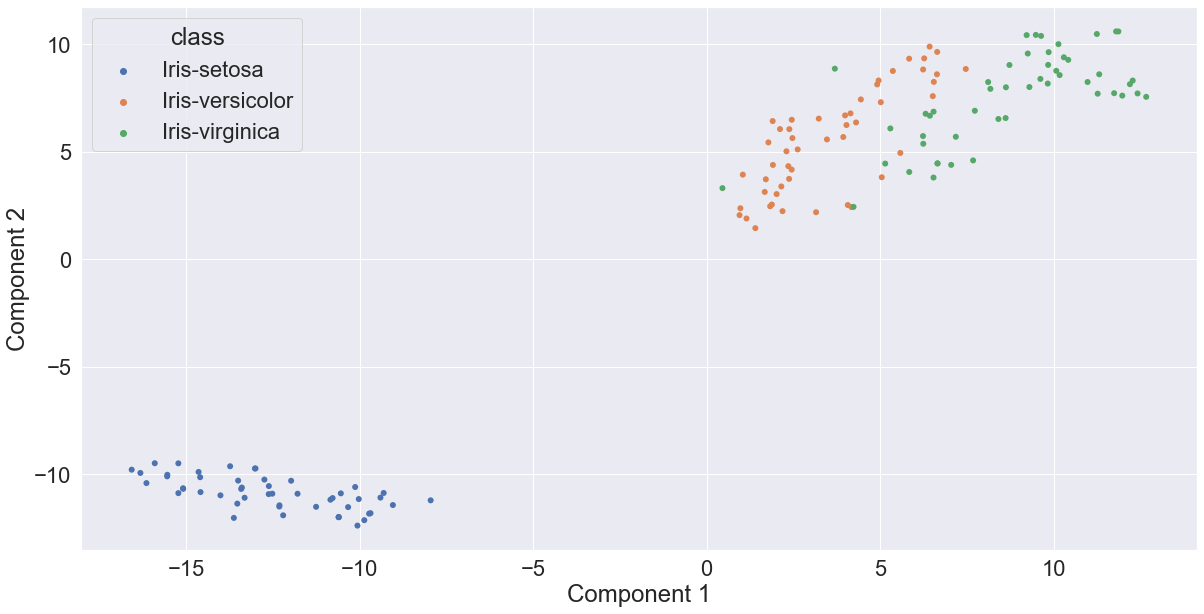

In [40]:
plt.rcParams['axes.labelsize'] = 20
sns.set(font_scale = 2)
sns.scatterplot(x="Component 1", y="Component 2", sizes=(1, 8), linewidth=0,data=tsne_df,hue='class')
plt.show()

# 2. Feature Selection

#### 1. Univariate Feature Selection

i. Univariate Feature Selection using SelectKBest<br />
We use chi2 as our score function because the input features are non-negative and the output is categorical. For categorical output variable we use f_classif scoring function. For numerical output variable we use r_regression scoring function.

In [41]:
from sklearn.feature_selection import SelectKBest,chi2

In [52]:
select_k_best=SelectKBest(chi2,k=3)
select_k_best_fit=select_k_best.fit(features,y)
k_best=pd.DataFrame(select_k_best_fit.scores_,columns=['Score'],index=features.columns).sort_values(by='Score',ascending=False)
k_best

,Score
petal_length,116.169847
petal_width,67.244828
sepal_length,10.817821
sepal_width,3.594499


Visualize k best features

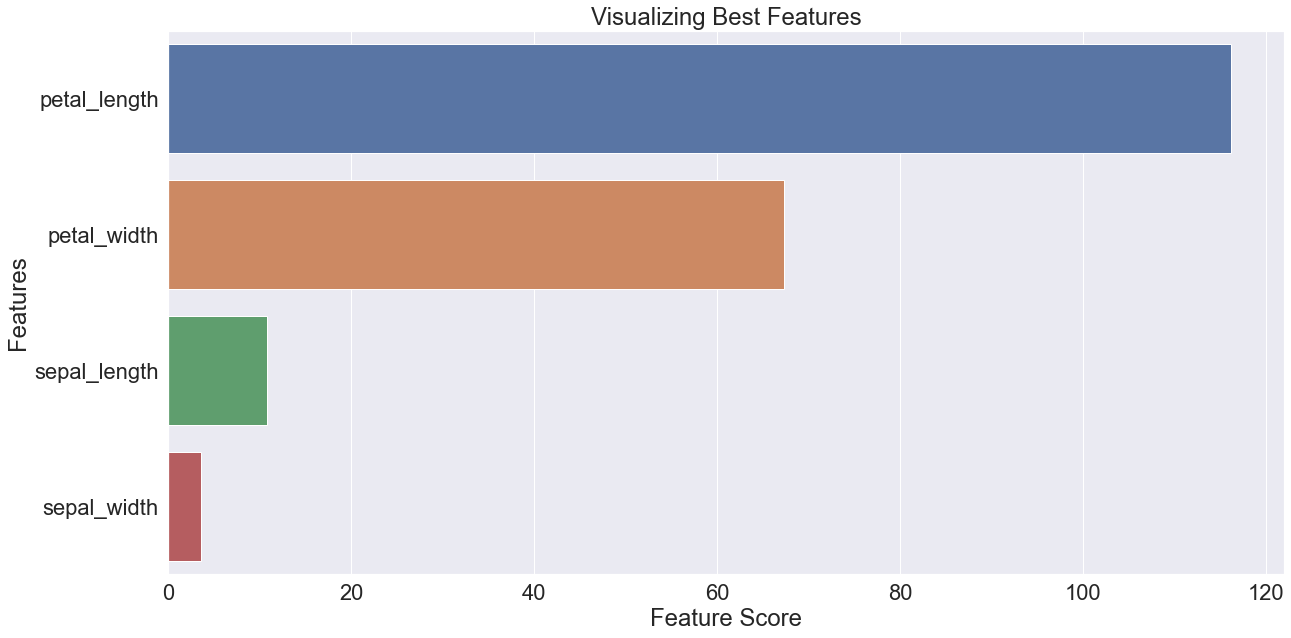

In [54]:
sns.barplot(y=k_best.index, x=k_best.Score)
plt.xlabel('Feature Score')
plt.ylabel('Features')
plt.title("Visualizing Best Features")
plt.show()

Select 3 best features

In [43]:
print(k_best.nlargest(3,'Score'))

petal_length    116.169847
petal_width      67.244828
sepal_length     10.817821
dtype: float64


ii. Univariate Feature Selection using SelectPercentile<br />
We use chi2 as our score function because the input features are non-negative and the output is categorical. For categorical output variable we use f_classif scoring function. For numerical output variable we use r_regression scoring function.

In [44]:
from sklearn.feature_selection import SelectPercentile, chi2

In [48]:
select_p_best=SelectPercentile(chi2,percentile=10)
select_p_best_fit=select_p_best.fit(features,y)
p_best=pd.DataFrame(select_p_best_fit.scores_,columns=['Score'],index=features.columns).sort_values(by='Score',ascending=False)
p_best

,Score
petal_length,116.169847
petal_width,67.244828
sepal_length,10.817821
sepal_width,3.594499


Select best 3 features

In [50]:
print(p_best['Score'].nlargest(3))

petal_length    116.169847
petal_width      67.244828
sepal_length     10.817821
Name: Score, dtype: float64
